In [1]:
import json
import pandas as pd
import seaborn as sns
import scipy.stats as stats
sns.set_theme(style="ticks", palette="pastel")
files=['results_big_new/2to4Long.json','results_big_new/2to3Long.json']
longdf =pd.DataFrame()
name={}
name['3662568322']="ipmedia-1"
name['3645790703']="ipmedia-2"
name['3629013084']="ipmedia-3"
name['3612235465']="ipmedia-4"

for file in files: 
    print("Using File:" + file.split('/')[1].split('.')[0])
    f=open(file)
    data=json.load(f)
    data=data[0] 
    sdf=pd.DataFrame(data['sender']['points'][0])
    keys=list(data['receivers'].keys())
    key=''
    if len(keys) == 1: 
        key=keys[0]
    rdf=pd.DataFrame(data['receivers'][key]['points'][0])
    difdf=pd.DataFrame()
    difdf['dt_timestamp']=rdf['timestamp']-sdf['timestamp']
    difdf['dt_timestamp_ms']=difdf['dt_timestamp']/1000/1000
    difdf['dt_value']=rdf['value']-sdf['value']
    difdf['dt_sample']=rdf['sample']-sdf['sample']
    difdf['latency_s']=sdf['latency']
    difdf['latency_r']=rdf['latency']
    difdf['value']=sdf['value']
    difdf['sample']=sdf['sample']
    difdf['receiver'] = name[key]
    difdf['key']=int(key)
    difdf['dt_timestamp_ms']=difdf['dt_timestamp']/1000/1000
    difdf['index'] = difdf.index
    difdf['testcase'] = file.split('/')[1].split('.')[0]
    longdf=pd.concat([longdf, difdf])

ip3df=longdf[longdf['receiver'] == "ipmedia-3"]
ip4df=longdf[longdf['receiver'] == "ipmedia-4"]
    
longdf.head()



Using File:2to4Long
Using File:2to3Long


dt_timestamp  dt_timestamp_ms  dt_value  dt_sample  latency_s  latency_r  \
0      13355800          13.3558         0          1        256          0   
1      13361600          13.3616         0          1        256          0   
2      13357800          13.3578         0          1        256          0   
3      14660600          14.6606         0          1        256          0   
4      13362200          13.3622         0          1        256          0   

   value  sample   receiver         key  index  testcase  
0      2   10000  ipmedia-4  3612235465      0  2to4Long  
1      1   20000  ipmedia-4  3612235465      1  2to4Long  
2      2   30000  ipmedia-4  3612235465      2  2to4Long  
3      1   40000  ipmedia-4  3612235465      3  2to4Long  
4      2   50000  ipmedia-4  3612235465      4  2to4Long

In [2]:
print(ip3df['dt_timestamp_ms'].median())
ip3df.describe()

13.362200000000001


dt_timestamp  dt_timestamp_ms  dt_value  dt_sample  latency_s  \
count  9.990000e+02        999.00000     999.0      999.0      999.0   
mean   1.369869e+07         13.69869       0.0        1.0      256.0   
std    5.813497e+05          0.58135       0.0        0.0        0.0   
min    1.318910e+07         13.18910       0.0        1.0      256.0   
25%    1.335350e+07         13.35350       0.0        1.0      256.0   
50%    1.336220e+07         13.36220       0.0        1.0      256.0   
75%    1.355830e+07         13.55830       0.0        1.0      256.0   
max    1.485930e+07         14.85930       0.0        1.0      256.0   

       latency_r       value        sample           key       index  
count      999.0  999.000000  9.990000e+02  9.990000e+02  999.000000  
mean         0.0    1.500501  5.000000e+06  3.629013e+09  499.000000  
std          0.0    0.500250  2.885308e+06  0.000000e+00  288.530761  
min          0.0    1.000000  1.000000e+04  3.629013e+09    0.000000  
25%          0.0    1.000000  2.505000e+06  3.629013e+09  249.500000  
50%          0.0    2.000000  5.000000e+06  3.629013e+09  499.000000  
75%          0.0    2.000000  7.495000e+06  3.629013e+09  748.500000  
max          0.0    2.000000  9.990000e+06  3.629013e+09  998.000000

In [3]:
print(ip4df['dt_timestamp_ms'].median())
ip4df.describe()

13.3626


dt_timestamp  dt_timestamp_ms  dt_value  dt_sample  latency_s  \
count  9.990000e+02       999.000000     999.0      999.0      999.0   
mean   1.369360e+07        13.693603       0.0        1.0      256.0   
std    5.825235e+05         0.582524       0.0        0.0        0.0   
min    1.295380e+07        12.953800       0.0        1.0      256.0   
25%    1.335710e+07        13.357100       0.0        1.0      256.0   
50%    1.336260e+07        13.362600       0.0        1.0      256.0   
75%    1.355600e+07        13.556000       0.0        1.0      256.0   
max    1.486290e+07        14.862900       0.0        1.0      256.0   

       latency_r       value        sample           key       index  
count      999.0  999.000000  9.990000e+02  9.990000e+02  999.000000  
mean         0.0    1.500501  5.000000e+06  3.612235e+09  499.000000  
std          0.0    0.500250  2.885308e+06  0.000000e+00  288.530761  
min          0.0    1.000000  1.000000e+04  3.612235e+09    0.000000  
25%          0.0    1.000000  2.505000e+06  3.612235e+09  249.500000  
50%          0.0    2.000000  5.000000e+06  3.612235e+09  499.000000  
75%          0.0    2.000000  7.495000e+06  3.612235e+09  748.500000  
max          0.0    2.000000  9.990000e+06  3.612235e+09  998.000000

[Text(0.5, 0, 'Test Case'), Text(0, 0.5, 'Latency [ms]')]

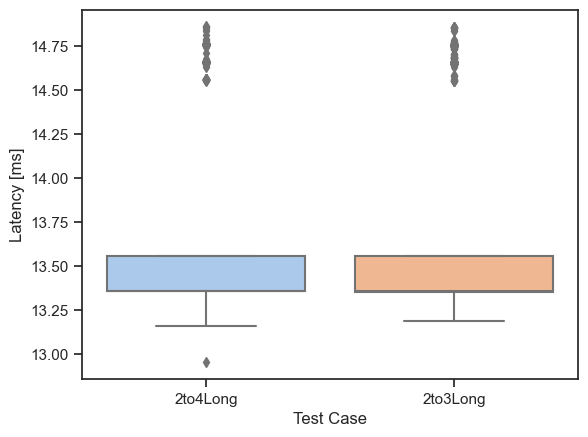

In [4]:
ax=sns.boxplot(y=longdf['dt_timestamp_ms'],x=longdf['testcase'])
ax.set(xlabel='Test Case', ylabel='Latency [ms]')

[Text(0.5, 0, 'Value'), Text(0, 0.5, 'Latency [ms]')]

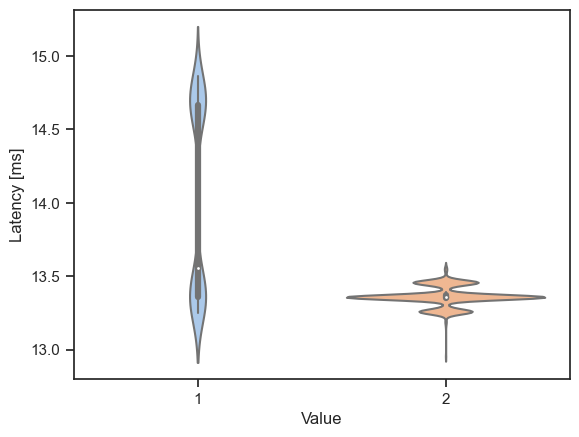

In [5]:
ax=sns.violinplot(x=longdf['value'], y=longdf['dt_timestamp_ms'])
ax.set(xlabel='Value', ylabel='Latency [ms]')

[Text(0.5, 0, 'Value'), Text(0, 0.5, 'Latency [ms]')]

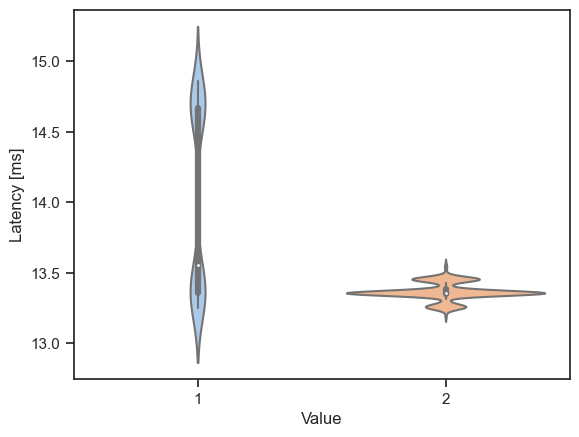

In [6]:
ax=sns.violinplot(x=ip3df['value'], y=ip3df['dt_timestamp_ms'])
ax.set(xlabel='Value', ylabel='Latency [ms]')

[Text(0.5, 0, 'Value'), Text(0, 0.5, 'Latency [ms]')]

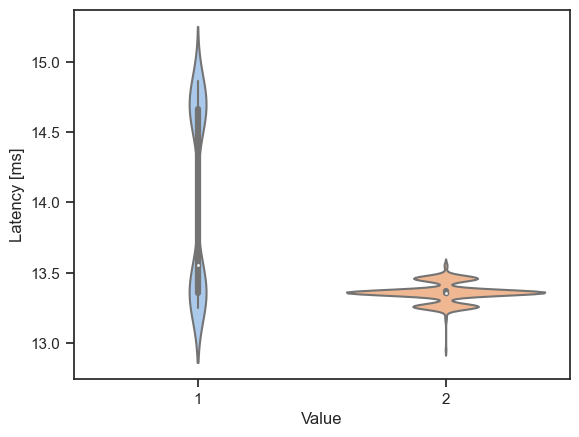

In [7]:
ax=sns.violinplot(x=ip4df['value'], y=ip4df['dt_timestamp_ms'])
ax.set(xlabel='Value', ylabel='Latency [ms]')

In [8]:
from scipy.stats import ttest_ind
data1=longdf[longdf['testcase'] =='2to4Long']['dt_timestamp_ms']
data2=longdf[longdf['testcase'] =='2to3Long']['dt_timestamp_ms']
t_statistic, p_value = ttest_ind(data1, data2)
print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: -0.19539064447274304
p-value: 0.8451070274401795
